In [ ]:
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader

In [ ]:
train_set = MNIST('.MNIST', transform=transforms.ToTensor(), train=True, download=True)
val_set = MNIST('.MNIST', transform=transforms.ToTensor(), train=False, download=True)

In [ ]:
x, y = train_set[0]
x.shape

torch.Size([1, 28, 28])

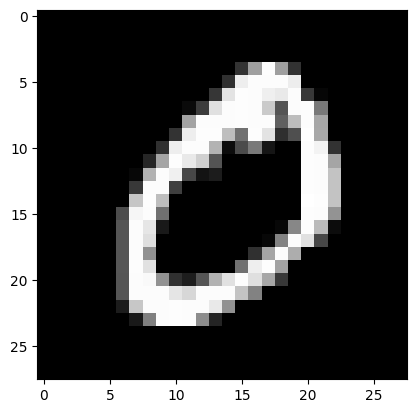

0


In [ ]:
import matplotlib.pyplot as plt

x, y = train_set[1]
plt.imshow(x[0,:,:], cmap='gray')
plt.show()
print(y)

In [ ]:
train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
val_loader = DataLoader(val_set, batch_size=64, shuffle=False)

In [ ]:
from torch import nn
import torch.nn.functional as F
import torch

class MLP(nn.Module):
    def __init__(self, hidden_size):
        super().__init__()

        self.linear1 = nn.Linear(784, hidden_size)
        self.linear2 = nn.Linear(hidden_size, 10)


    def forward(self, x):
        # (batch_size, 1, 28, 28)
        x = torch.flatten(x, start_dim=1)
        # (batch_size, 784)
        x = self.linear1(x)
        x = F.relu(x)
        x = self.linear2(x)
        return x

In [ ]:
batch = next(iter(train_loader))
batch[1].shape

torch.Size([64])

In [ ]:
net = MLP(hidden_size=100)
net(batch[0]).shape

torch.Size([64, 10])

In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

count_parameters(net)

79510

In [ ]:
def test(net, loader):
    net.eval()

    correct, total = 0, 0

    for batch in loader:
        images, labels = batch[0], batch[1]
        images = images.to('cuda')
        labels = labels.to('cuda')

        with torch.no_grad():
            out = net(images)
        pred = torch.argmax(out, dim=1)

        total += len(pred)
        correct += (pred == labels).cpu().numpy().sum()

    return correct / total

In [ ]:
def train(net, train_loader, val_loader, optimizer, epochs=10):
    train_acc, val_acc = [], []
    net.train()

    for epoch in range(epochs):

        correct, total = 0, 0

        for batch in train_loader:
            images, labels = batch[0], batch[1]
            images = images.to('cuda')
            labels = labels.to('cuda')

            optimizer.zero_grad()
            out = net(images)
            loss = F.cross_entropy(out, labels)
            loss.backward()
            optimizer.step()

            pred = torch.argmax(out, dim=1)

            total += len(pred)
            correct += (pred == labels).detach().cpu().numpy().sum()

        train_acc.append(correct / total)
        val_acc.append(test(net, val_loader))

        print(f"Epoch: {epoch}")
        print(f"train accuracy: {train_acc[-1]}")
        print(f"val accuracy: {val_acc[-1]}")

    return train_acc, val_acc

In [ ]:
net = MLP(hidden_size=1000).to('cuda')
optimizer = torch.optim.SGD(net.parameters(), lr=0.1, momentum=0.9)

In [ ]:
train_acc, val_acc = train(net, train_loader, val_loader, optimizer, epochs=10)

Epoch: 0
train accuracy: 0.9353166666666667
val accuracy: 0.9706
Epoch: 1
train accuracy: 0.9743166666666667
val accuracy: 0.9728
Epoch: 2
train accuracy: 0.9821833333333333
val accuracy: 0.9779
Epoch: 3
train accuracy: 0.9872333333333333
val accuracy: 0.9795
Epoch: 4
train accuracy: 0.9915
val accuracy: 0.9803
Epoch: 5
train accuracy: 0.9943166666666666
val accuracy: 0.9833
Epoch: 6
train accuracy: 0.9960833333333333
val accuracy: 0.9842
Epoch: 7
train accuracy: 0.9978333333333333
val accuracy: 0.9831
Epoch: 8
train accuracy: 0.9991166666666667
val accuracy: 0.9833
Epoch: 9
train accuracy: 0.9997666666666667
val accuracy: 0.9858


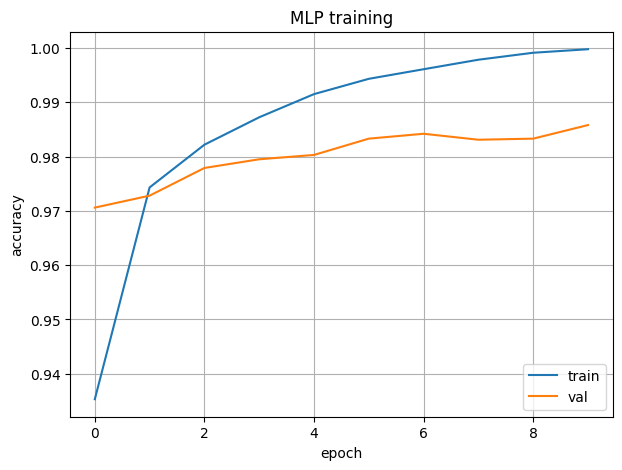

In [ ]:
import numpy as np

plt.figure(figsize=(7, 5))

plt.plot(np.arange(10), train_acc, label='train')
plt.plot(np.arange(10), val_acc, label='val')

plt.grid()
plt.legend(loc='lower right')
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("MLP training")
plt.show()

In [ ]:
count_parameters(net)

795010

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

# convolutional neural network
class ConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5)
        self.pool = nn.MaxPool2d(kernel_size=2)
        self.fc = nn.Linear(512, 10)

    def forward(self, x):
        x = F.relu(self.pool(self.conv1(x)))
        x = F.relu(self.pool(self.conv2(x)))

        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = self.fc(x)
        return x

net = ConvNet()
batch = next(iter(train_loader))
net(batch[0]).shape

torch.Size([64, 10])

In [ ]:
count_parameters(net)

18378

In [ ]:
net = ConvNet().to('cuda')
optimizer = torch.optim.SGD(net.parameters(), lr=0.01, momentum=0.9)
train_acc, val_acc = train(net, train_loader, val_loader, optimizer, epochs=5)

Epoch: 0
train accuracy: 0.9237666666666666
val accuracy: 0.9796
Epoch: 1
train accuracy: 0.9777
val accuracy: 0.9853
Epoch: 2
train accuracy: 0.9830666666666666
val accuracy: 0.9862
Epoch: 3
train accuracy: 0.9859333333333333
val accuracy: 0.9872
Epoch: 4
train accuracy: 0.9879
val accuracy: 0.9894


In [ ]:
plt.figure(figsize=(7, 5))
plt.plot(np.arange(10), train_acc, label='train')
plt.plot(np.arange(10), val_acc, label='val')
plt.grid()
plt.legend(loc='lower right')
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("CNN training")
plt.show()